In [2]:
import numpy as np
%load_ext autoreload
%autoreload 2
%cd '/home/xingyu/Projects/PlasticineLab'
%pwd


from chester.plotting.cplot import *
data_paths = ['data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/']

exps_data, plottable_keys, distinct_params = reload_data(data_paths)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/xingyu/Projects/PlasticineLab
['data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/']
finished walking exp folders
Reading data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/progress.csv
Reading data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/plan_epoch_150/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/plan_epoch_150/progress.csv'
Reading data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/plan_epoch_50/progress.csv
[Errno 2] No such file or directory: 'data/autobot/0907_PushSpread_full/0907_PushSpread_full/0907_PushSpread_full_2021_09_07_01_23_59_0007/plan_epoch_50/progress.csv'
Reading dat

here


/home/xingyu/Projects/PlasticineLab/chester/plotting/cplot.py:82: RuntimeWarning: Mean of empty slice
  means = np.nanmean(progresses, axis=0)
/home/xingyu/software/miniconda3/envs/plb/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


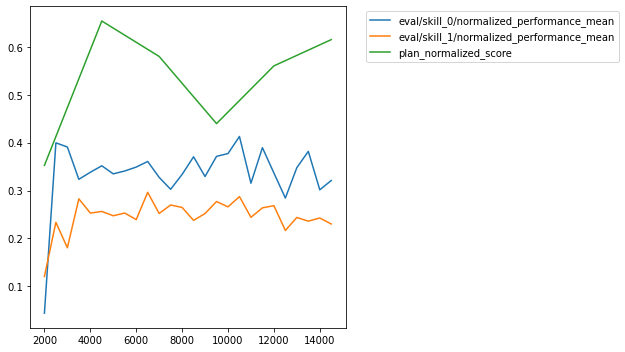

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

def custom_series_splitter(x):
    params = x['flat_params']
    return 'x'

group_selectors, group_legends = get_group_selectors(exps_data, custom_series_splitter)
print('here')

keys = ['eval/skill_0/normalized_performance_mean',
        'eval/skill_1/normalized_performance_mean',
        'plan_normalized_score']
fig = plt.figure(figsize=(5,5))
for idx, (selector, legend) in enumerate(zip(group_selectors, group_legends)):
    for key in keys:
        y, y_lower, y_upper = get_shaded_curve(selector, key)
        # print(legend, y[-4:], np.array(y_upper[-4:]) - np.array(y[-4:]))
        y = np.array(y)
        mask = np.where(np.invert(np.isnan(y)))[0]
        steps = np.arange(0, len(y))[mask] * 500 + 2000
        plt.plot(steps, y[mask], label=key)
# plt.ylim(0, 0.05)
# plt.yscale('log')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('./data/plots/0906_full.png', bbox_inches="tight")
plt.show()